In [470]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import math

C:\Users\84866\AppData\Local\Temp\ipykernel_21668\2688367533.py:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(all_points[:, 0], all_points[:, 1], c='b', cmap='viridis')


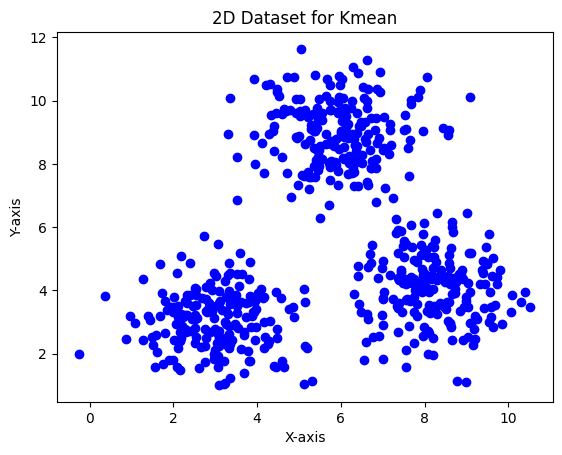

In [471]:
np.random.seed(42)
n_points = 200
class1_points = np.random.normal(loc=[3,3], scale=[1,1], size=(n_points, 2))
class2_points = np.random.normal(loc=[6,9], scale=[1,1], size=(n_points, 2))
class3_points = np.random.normal(loc=[8,4], scale=[1,1], size=(n_points, 2))
all_points = np.concatenate([class1_points, class2_points, class3_points])


plt.scatter(all_points[:, 0], all_points[:, 1], c='b', cmap='viridis')
plt.title('2D Dataset for Kmean')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

In [472]:
X = all_points
k = 3

In [473]:
def init_centroids(X, k):
    return X[np.random.choice(X.shape[0], k, replace=True)]

In [474]:
def converged(labels, pred_labels):
    return np.all((labels - pred_labels) == 0)

In [475]:
# np.random.seed(42)
centroids = init_centroids(X, k)
index = 0
labels = []
centroids_lst = []
centroids_lst.append(centroids)
D = cdist(X, centroids)
labels.append(np.argmin(D,axis = 1))
while True:
    centroids = np.zeros_like(centroids_lst[-1])
    for j in range(k):
        centroids[j, :] = np.mean(X[np.where(labels[index]==j)], axis=0)
    centroids_lst.append(centroids)
    D = cdist(X, centroids)
    labels.append(np.argmin(D,axis = 1))
    if index > 0:
        if converged(labels[index], labels[index - 1]):
            break
    index += 1

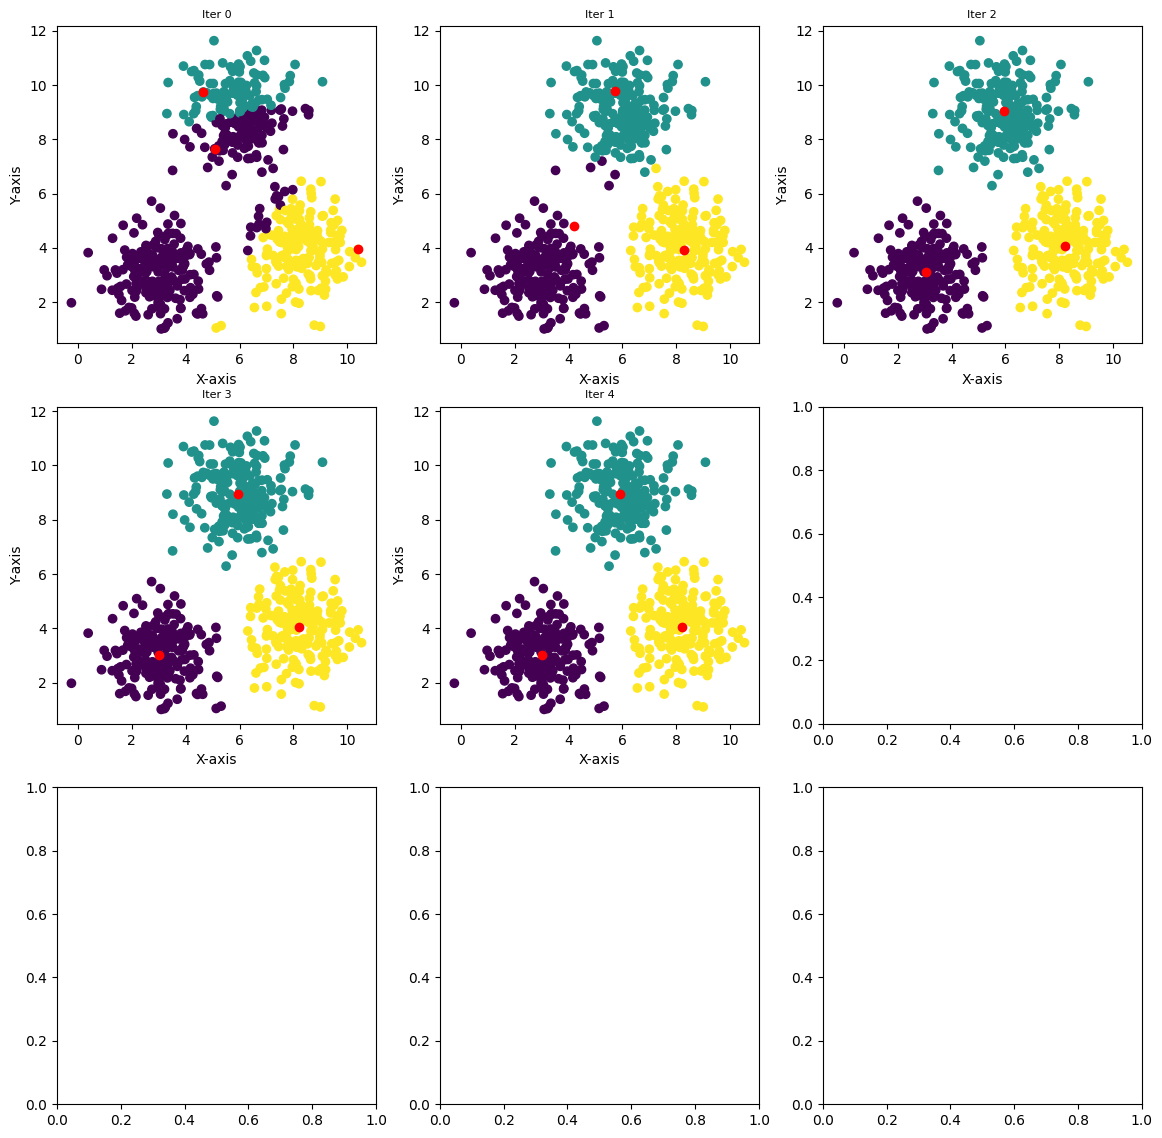

In [476]:
fig, axs = plt.subplots(3, 3, figsize = (14, 14))
for index, label in enumerate(labels):
    axs[math.floor(index / 3), index % 3].scatter(all_points[:, 0], all_points[:, 1], c=label, cmap='viridis')
    axs[math.floor(index / 3), index % 3].scatter(centroids_lst[index][:, 0], centroids_lst[index][:, 1], c='r')
    axs[math.floor(index / 3), index % 3].set_title(f'Iter {index}', fontsize = 8)
    axs[math.floor(index / 3), index % 3].set_xlabel('X-axis')
    axs[math.floor(index / 3), index % 3].set_ylabel('Y-axis')
plt.show()